In [1]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras import backend as K
from sklearn.metrics import confusion_matrix
from resizeimage import resizeimage
from sklearn import svm
import numpy as np
import cv2 as cv
import os
import random
import PIL
import pickle
import matplotlib.pyplot as plt
import itertools



Using TensorFlow backend.


# Load des images 

In [2]:
def load_data(classif):
    
    z = [x[0] for x in os.walk('./raw-img/')]
    del z[0]
    img = {} 
    for directory in z:
        current_name = directory.split('/')[-1]
        classe = classif[current_name]
        for file in os.listdir(directory):
            if file.endswith(".jpg") or file.endswith(".jpeg"):
                img[file] = classe
    return img

classif = {
		"cavallo" : 0,
		"elefante" : 1
	}

classifBis = {
		0 : "cavallo",
		1 : "elefante"
	}

img = load_data(classif)

# Compute CNN on images loaded

In [3]:
def computeCNN(cnn, classifBis, img):
    samples = []
    responses = []
    vects = {} 
    counter = 0
    for im in img:
        counter += 1
        print(counter,' /', 4158)
        TAILLE = [299, 299]
        myimage = PIL.Image.open('./raw-img/'+classifBis[img[im]]+'/'+im)
        myimage = resizeimage.resize_contain(myimage, TAILLE)
        img_data = image.img_to_array(myimage)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data) #Normalisation des pixels

        googleNet_feature = cnn.predict(img_data)
        # Retrieve the vectors generated by InceptionV3
        vects[im] = googleNet_feature
    return vects

In [4]:
#Launch InceptionV3
#We load imagenet weights, desactivate the fully connected layer (MLP) and specify pooling mode to avg to retrieve 2D tensors
base_model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')
base_model.summary()
vects = computeCNN(base_model, classifBis, img)
print(vects)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

2  / 4158
3  / 4158
4  / 4158
5  / 4158
6  / 4158
7  / 4158
8  / 4158
9  / 4158
10  / 4158
11  / 4158
12  / 4158
13  / 4158
14  / 4158
15  / 4158
16  / 4158
17  / 4158
18  / 4158
19  / 4158
20  / 4158
21  / 4158
22  / 4158
23  / 4158
24  / 4158
25  / 4158
26  / 4158
27  / 4158
28  / 4158
29  / 4158
30  / 4158
31  / 4158
32  / 4158
33  / 4158
34  / 4158
35  / 4158
36  / 4158
37  / 4158
38  / 4158
39  / 4158
40  / 4158
41  / 4158
42  / 4158
43  / 4158
44  / 4158
45  / 4158
46  / 4158
47  / 4158
48  / 4158
49  / 4158
50  / 4158
51  / 4158
52  / 4158
53  / 4158
54  / 4158
55  / 4158
56  / 4158
57  / 4158
58  / 4158
59  / 4158
60  / 4158
61  / 4158
62  / 4158
63  / 4158
64  / 4158
65  / 4158
66  / 4158
67  / 4158
68  / 4158
69  / 4158
70  / 4158
71  / 4158
72  / 4158
73  / 4158
74  / 4158
75  / 4158
76  / 4158
77  / 4158
78  / 4158
79  / 4158
80  / 4158
81  / 4158
82  / 4158
83  / 4158
84  / 4158
85  / 4158
86  / 4158
87  / 4158
88  / 4158
89  / 4158
90  / 4158
91  / 4158
92  / 4158
93  / 4

694  / 4158
695  / 4158
696  / 4158
697  / 4158
698  / 4158
699  / 4158
700  / 4158
701  / 4158
702  / 4158
703  / 4158
704  / 4158
705  / 4158
706  / 4158
707  / 4158
708  / 4158
709  / 4158
710  / 4158
711  / 4158
712  / 4158
713  / 4158
714  / 4158
715  / 4158
716  / 4158
717  / 4158
718  / 4158
719  / 4158
720  / 4158
721  / 4158
722  / 4158
723  / 4158
724  / 4158
725  / 4158
726  / 4158
727  / 4158
728  / 4158
729  / 4158
730  / 4158
731  / 4158
732  / 4158
733  / 4158
734  / 4158
735  / 4158
736  / 4158
737  / 4158
738  / 4158
739  / 4158
740  / 4158
741  / 4158
742  / 4158
743  / 4158
744  / 4158
745  / 4158
746  / 4158
747  / 4158
748  / 4158
749  / 4158
750  / 4158
751  / 4158
752  / 4158
753  / 4158
754  / 4158
755  / 4158
756  / 4158
757  / 4158
758  / 4158
759  / 4158
760  / 4158
761  / 4158
762  / 4158
763  / 4158
764  / 4158
765  / 4158
766  / 4158
767  / 4158
768  / 4158
769  / 4158
770  / 4158
771  / 4158
772  / 4158
773  / 4158
774  / 4158
775  / 4158
776  / 4158
777 

1348  / 4158
1349  / 4158
1350  / 4158
1351  / 4158
1352  / 4158
1353  / 4158
1354  / 4158
1355  / 4158
1356  / 4158
1357  / 4158
1358  / 4158
1359  / 4158
1360  / 4158
1361  / 4158
1362  / 4158
1363  / 4158
1364  / 4158
1365  / 4158
1366  / 4158
1367  / 4158
1368  / 4158
1369  / 4158
1370  / 4158
1371  / 4158
1372  / 4158
1373  / 4158
1374  / 4158
1375  / 4158
1376  / 4158
1377  / 4158
1378  / 4158
1379  / 4158
1380  / 4158
1381  / 4158
1382  / 4158
1383  / 4158
1384  / 4158
1385  / 4158
1386  / 4158
1387  / 4158
1388  / 4158
1389  / 4158
1390  / 4158
1391  / 4158
1392  / 4158
1393  / 4158
1394  / 4158
1395  / 4158
1396  / 4158
1397  / 4158
1398  / 4158
1399  / 4158
1400  / 4158
1401  / 4158
1402  / 4158
1403  / 4158
1404  / 4158
1405  / 4158
1406  / 4158
1407  / 4158
1408  / 4158
1409  / 4158
1410  / 4158
1411  / 4158
1412  / 4158
1413  / 4158
1414  / 4158
1415  / 4158
1416  / 4158
1417  / 4158
1418  / 4158
1419  / 4158
1420  / 4158
1421  / 4158
1422  / 4158
1423  / 4158
1424  / 4158

1979  / 4158
1980  / 4158
1981  / 4158
1982  / 4158
1983  / 4158
1984  / 4158
1985  / 4158
1986  / 4158
1987  / 4158
1988  / 4158
1989  / 4158
1990  / 4158
1991  / 4158
1992  / 4158
1993  / 4158
1994  / 4158
1995  / 4158
1996  / 4158
1997  / 4158
1998  / 4158
1999  / 4158
2000  / 4158
2001  / 4158
2002  / 4158
2003  / 4158
2004  / 4158
2005  / 4158
2006  / 4158
2007  / 4158
2008  / 4158
2009  / 4158
2010  / 4158
2011  / 4158
2012  / 4158
2013  / 4158
2014  / 4158
2015  / 4158
2016  / 4158
2017  / 4158
2018  / 4158
2019  / 4158
2020  / 4158
2021  / 4158
2022  / 4158
2023  / 4158
2024  / 4158
2025  / 4158
2026  / 4158
2027  / 4158
2028  / 4158
2029  / 4158
2030  / 4158
2031  / 4158
2032  / 4158
2033  / 4158
2034  / 4158
2035  / 4158
2036  / 4158
2037  / 4158
2038  / 4158
2039  / 4158
2040  / 4158
2041  / 4158
2042  / 4158
2043  / 4158
2044  / 4158
2045  / 4158
2046  / 4158
2047  / 4158
2048  / 4158
2049  / 4158
2050  / 4158
2051  / 4158
2052  / 4158
2053  / 4158
2054  / 4158
2055  / 4158

2610  / 4158
2611  / 4158
2612  / 4158
2613  / 4158
2614  / 4158
2615  / 4158
2616  / 4158
2617  / 4158
2618  / 4158
2619  / 4158
2620  / 4158
2621  / 4158
2622  / 4158
2623  / 4158
2624  / 4158
2625  / 4158
2626  / 4158
2627  / 4158
2628  / 4158
2629  / 4158
2630  / 4158
2631  / 4158
2632  / 4158
2633  / 4158
2634  / 4158
2635  / 4158
2636  / 4158
2637  / 4158
2638  / 4158
2639  / 4158
2640  / 4158
2641  / 4158
2642  / 4158
2643  / 4158
2644  / 4158
2645  / 4158
2646  / 4158
2647  / 4158
2648  / 4158
2649  / 4158
2650  / 4158
2651  / 4158
2652  / 4158
2653  / 4158
2654  / 4158
2655  / 4158
2656  / 4158
2657  / 4158
2658  / 4158
2659  / 4158
2660  / 4158
2661  / 4158
2662  / 4158
2663  / 4158
2664  / 4158
2665  / 4158
2666  / 4158
2667  / 4158
2668  / 4158
2669  / 4158
2670  / 4158
2671  / 4158
2672  / 4158
2673  / 4158
2674  / 4158
2675  / 4158
2676  / 4158
2677  / 4158
2678  / 4158
2679  / 4158
2680  / 4158
2681  / 4158
2682  / 4158
2683  / 4158
2684  / 4158
2685  / 4158
2686  / 4158

3241  / 4158
3242  / 4158
3243  / 4158
3244  / 4158
3245  / 4158
3246  / 4158
3247  / 4158
3248  / 4158
3249  / 4158
3250  / 4158
3251  / 4158
3252  / 4158
3253  / 4158
3254  / 4158
3255  / 4158
3256  / 4158
3257  / 4158
3258  / 4158
3259  / 4158
3260  / 4158
3261  / 4158
3262  / 4158
3263  / 4158
3264  / 4158
3265  / 4158
3266  / 4158
3267  / 4158
3268  / 4158
3269  / 4158
3270  / 4158
3271  / 4158
3272  / 4158
3273  / 4158
3274  / 4158
3275  / 4158
3276  / 4158
3277  / 4158
3278  / 4158
3279  / 4158
3280  / 4158
3281  / 4158
3282  / 4158
3283  / 4158
3284  / 4158
3285  / 4158
3286  / 4158
3287  / 4158
3288  / 4158
3289  / 4158
3290  / 4158
3291  / 4158
3292  / 4158
3293  / 4158
3294  / 4158
3295  / 4158
3296  / 4158
3297  / 4158
3298  / 4158
3299  / 4158
3300  / 4158
3301  / 4158
3302  / 4158
3303  / 4158
3304  / 4158
3305  / 4158
3306  / 4158
3307  / 4158
3308  / 4158
3309  / 4158
3310  / 4158
3311  / 4158
3312  / 4158
3313  / 4158
3314  / 4158
3315  / 4158
3316  / 4158
3317  / 4158

3872  / 4158
3873  / 4158
3874  / 4158
3875  / 4158
3876  / 4158
3877  / 4158
3878  / 4158
3879  / 4158
3880  / 4158
3881  / 4158
3882  / 4158
3883  / 4158
3884  / 4158
3885  / 4158
3886  / 4158
3887  / 4158
3888  / 4158
3889  / 4158
3890  / 4158
3891  / 4158
3892  / 4158
3893  / 4158
3894  / 4158
3895  / 4158
3896  / 4158
3897  / 4158
3898  / 4158
3899  / 4158
3900  / 4158
3901  / 4158
3902  / 4158
3903  / 4158
3904  / 4158
3905  / 4158
3906  / 4158
3907  / 4158
3908  / 4158
3909  / 4158
3910  / 4158
3911  / 4158
3912  / 4158
3913  / 4158
3914  / 4158
3915  / 4158
3916  / 4158
3917  / 4158
3918  / 4158
3919  / 4158
3920  / 4158
3921  / 4158
3922  / 4158
3923  / 4158
3924  / 4158
3925  / 4158
3926  / 4158
3927  / 4158
3928  / 4158
3929  / 4158
3930  / 4158
3931  / 4158
3932  / 4158
3933  / 4158
3934  / 4158
3935  / 4158
3936  / 4158
3937  / 4158
3938  / 4158
3939  / 4158
3940  / 4158
3941  / 4158
3942  / 4158
3943  / 4158
3944  / 4158
3945  / 4158
3946  / 4158
3947  / 4158
3948  / 4158

In [5]:
'''
We save the vector's dictionnary to don't compute it each time
'''
with open('saveVectors.pickle', 'wb') as handle:
    pickle.dump(vects, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

# Samples and responses load

In [3]:
'''
We retrieve the vector's dictionnary 
'''
with open('saveVectors.pickle', 'rb') as handle:
    vects = pickle.load(handle)
    
def load_cnn_vectors(vectors, img):
    '''
    Take the output vectors of the cnn inceptionV3 and create samples and responses with the data of load_class
    '''
    samples = []
    responses = []
    keys=list(vectors.keys()) # List of keys
    random.shuffle(keys)
    for key in keys :
        samples.append(vectors[key][0])
        responses.append(img[key])
    return np.array(samples).astype(np.float32), np.array(responses)

#Creation of sample data
samples, responses = load_cnn_vectors(vects, img)
print(samples.shape)

(4147, 2048)


# SVM

In [4]:
train_ratio = 0.8
train_n = int(len(samples)*train_ratio)

classifier = svm.SVC(C=20, kernel='poly', degree=2)

print('training...')

classifier.fit(samples[:train_n], responses[:train_n])
train_rate = np.mean(classifier.predict(samples[:train_n]) == responses[:train_n].astype(int))

print('testing...')
predict = classifier.predict(samples[train_n:])
responseToPlot = responses[train_n:].astype(int)
test_rate = np.mean(predict == responseToPlot)

print('train rate: %f  test rate: %f' % (train_rate*100, test_rate*100))
#print('support vectors: ', classif.support_vectors_)

training...


/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


testing...
train rate: 99.668375  test rate: 99.277108


# Matrice de confusion

Normalized confusion matrix


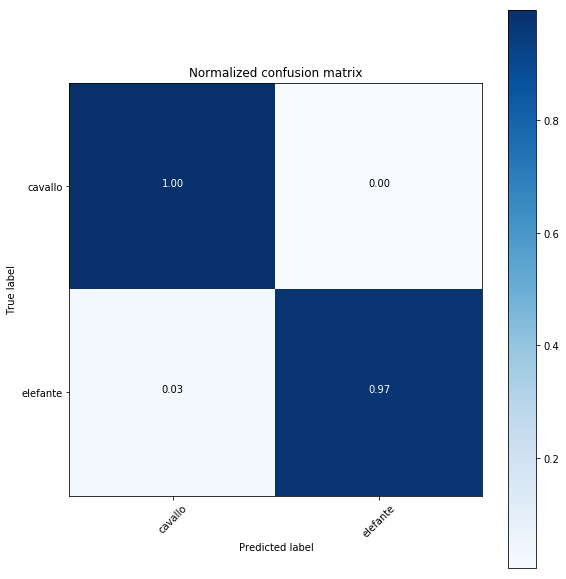

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(responseToPlot, predict)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(800/96, 800/96))
plot_confusion_matrix(cnf_matrix, classes=classif, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('ConfusionRBF.png')